# 필수과제 3: cGAN 📑

> 요번 과제에서는! 
- 논문을 읽고 차이를 이해할 수 있고,
- GAN 학습 방식을 이해하고 구현할 수 있으며,
- 생성모델과 판별모델의 차이를 이해하시면 성공!

[강의 링크](https://www.boostcourse.org/boostcampaitech2/lecture/1071720?isDesc=false)



# cGAN 이란? 🦓💫🐴
---
Condtional GAN에 대해서 우리는 수업시간에 Pix2Pix🎨, CycleGAN🦓💫🐴에 대해서 배웠는데요. 요기에 기초가 되는 논문이 바로 [Conditional Generative Adversarial Nets](https://arxiv.org/abs/1411.1784)입니다. 

cGAN이 뭘까요? 논문의 저자는 cGAN을 conditional version of GAN이라고 지칭하며 다음과 같이 설명합니다.






## Abstract
> **G**enerative **A**dversarial **N**ets were recently introduced as a novel way to train generative models. In this work we introduce the **conditional** version of generative adversarial nets, which can be constructed by **simply feeding the data, y,** we wish to condition on to both the generator and discriminator. We show that this **model can generate MNIST digits conditioned on class labels**. We also illustrate how this model could be used to learn a multi-modal model, and provide preliminary examples of an application to image tagging in which we demonstrate how this approach can generate descriptive tags which are not part of training labels.

## Guess what? 👀
즉, 말그대로 노이즈로부터 생성한 가짜 결과물인 z와, 진짜 결과물 x만 가지고 티키타카를 했었던 기존 GAN과는 달리 뭐가 하나 추가 되었을까요? (힌트: 아래 그림을 보고 유추해보세요. 추가 힌트는 살짝 숨겨놨습니다.)

In [9]:
# 추가 힌트: 초록색임 ✅

## Architecture of cGAN 
> Ref: [Conditional Generative Adversarial Nets](https://arxiv.org/abs/1411.1784)

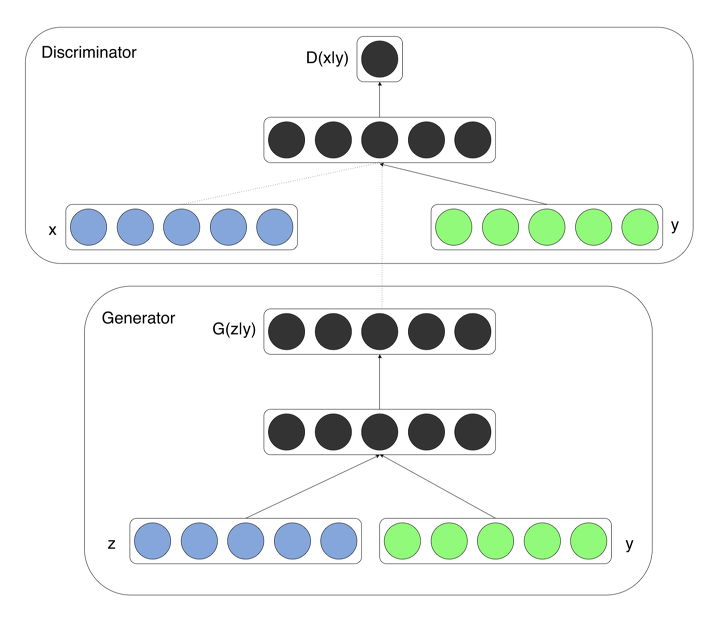

## what? 정답은...
정답은 바로바로! condition을 반영할 수 있는 **y 값**이 있는 거랍니다. 이 y 값은 쉽게 생각하면 class라고 생각할 수도 있어요. 자 조금 더 와닿을 수 있게 아래 그림을 봐볼게요. 
> Ref: [hwalsuklee's github 🤣](https://github.com/hwalsuklee/tensorflow-generative-model-collections/blob/master/CGAN.py)

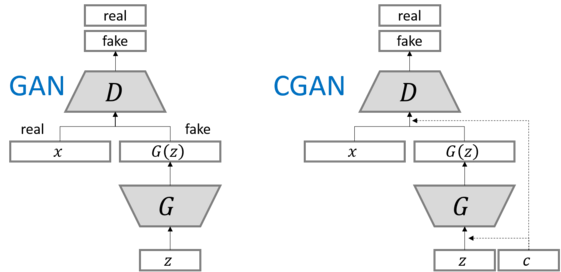

real x와 fake G(z) - 즉, 노이즈 z로부터 Generator를 통해 x같은 fake output을 내는 것. 만 존재했던 GAN과는 달리 cGAN은 **class인 c값 (논문에서는 y로 지칭**)이 뒤에 concat되어있죠? 

돌아가는 예시를 보면... GAN같은 경우에는 
> * ???: 야. 이거봐라~ 넌 **이런거** 없지? 
* 🧔🏻 G: 이거 봐 나도 비슷하게 만들었어!!!! 
* 👮🏻‍♀️ D: 아닌데? 완전 다른데? 
* 🧔🏻 G: (이틀 뒤) 이거 봐! 비슷하지?? 나도 **그런거** 있어!
* 👮🏻‍♀️ D: 오.. 뭐가뭔지 모르겠는데? - 성공

cGAN 같은 경우에는
> * ???: 야. 이거봐라~ v100이다~ 넌 **v100** 없지?
* 🧔🏻 G: 이거 봐 나도 v100 비슷한거 있어!
* 👮🏻‍♀️ D: 아닌데? 완전 다른데? 
* 🧔🏻 G: (이틀 뒤) 이거 봐! 비슷하지?? 나도 **v100** 있어!
* (계속)


이렇게 v100과 같이 뭘 만들어야하는지에 대한 class를 함께 알려주는게 cGAN이랍니다. 와아-

# Assignment 3의 정체. 뚜둥 ✨
이번 필수 과제 3에서는 이 **cGAN을 논문 베이스**로 만들어보는 걸 해볼거에요.
너무 겁먹지는 마세요! 많은 부분을 제공해드리고 여러분들은 퍼즐 맞추기처럼 비어있는 몇군데만 채워 넣으시면 되니까요 :) 저희가 함께 할게요!

## 논문보고 구현? 어떻게 하는건데?
캠퍼 분들. 혹시 논문 보고 구현해보신 적 있으신가요? 생각보다 많이 어렵지 않답니다.(물론 논문이 친절하다면요)
자, cGAN의 논문을 살펴볼까요? 

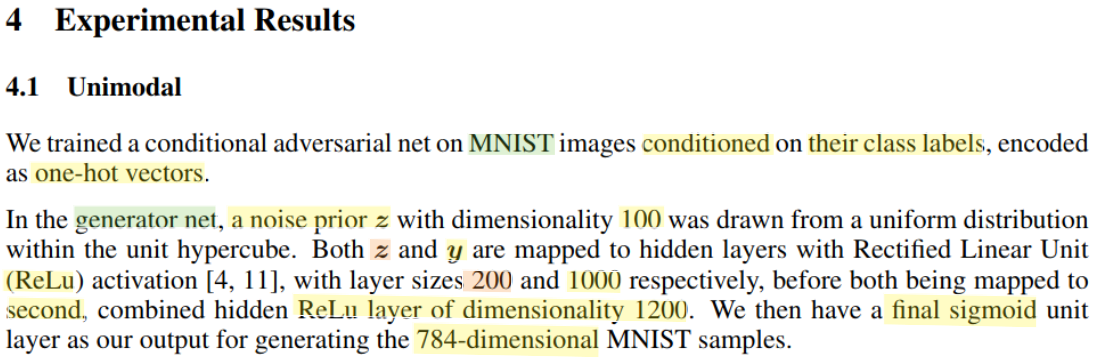


*   먼저, 논문의 cGAN은 condition을 MNIST의 클래스 레이블로 줬다고 합니다. 즉, 0-9까지의 클래스가 condition vector가 되겠죠?

GAN을 살짝 같이 봐볼게요! 

*   Noise z(noise prior z)의 차원은 100입니다. z와 condition y값은 ReLu라는 activation function으로 각각 200, 1000 사이즈로 매핑되어요.
* 두 번째(second) 레이어로 가기 전, combined(아마 concat이겠죠?) ReLu로 1200의 사이즈를 가지고 매핑됩니다. 
* 마지막으로! sigmoid는 784 차원의 output을 만들기 위해 거치는 거라고 하네요!

요걸 먼저 여러분들의 노트에 한번 그림으로 정리를 해보시구요. 그 그림을 코드로 옮겨보세요. 저는 요렇게 될 것 같네요 ㅎㅎ 


```
    # z = noise, y = class for consistency
    self.layer_z = torch.nn.Linear(100, 200)
    self.relu_z = torch.nn.ReLU()

    self.layer_y = torch.nn.Linear(parser.n_classes, 1000)
    self.relu_y = torch.nn.ReLU()

    self.layer_out = torch.nn.Linear(1200, 3*32*32)
```





이런 방식으로 우리는 cGAN을 완성해보는게 이번 Assignment 3의 목표랍니다 !

# Code 스따뜨!

## Quickdraw dataset
아래 코드는 Quickdraw dataset을 이용해서 cGAN을 학습시키기 위한 준비 코드입니다. 이제 익숙하시죠? 이 코드는 기본 제공 코드임으로 숨김처리 해두겠습니다. (궁금하신 분들은 열어보세요)

In [1]:
!pip install easydict

  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6350 sha256=8af3fc74bcdd286613eac1752eaf257641e9e1cd092a578a6e2913ca4df9c7ad
  Stored in directory: /opt/ml/.cache/pip/wheels/d3/e0/e9/305e348717e399665119bd012510d51ff4f22d709ff60c3096
Successfully built easydict


In [2]:
import json
import os
import numpy as np
import csv
import easydict

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable

from PIL import Image

from tqdm import tqdm

from time import sleep

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

os.makedirs("images", exist_ok=True)

In [4]:
!pip3 install quickdraw

In [3]:
from quickdraw import QuickDrawData, QuickDrawDataGroup
from torchvision import utils
import itertools
import matplotlib.pyplot as plt

import random
random.seed(100)

In [4]:
num_img_per_class = 3000
qd = QuickDrawData(max_drawings=num_img_per_class)

class_list = ['apple', 'wine bottle', 'spoon', 'rainbow', 'panda', 'hospital', 'scissors', 'toothpaste', 'baseball', 'hourglass']
class_dict = {'apple' : 0, 'wine bottle' : 1, 'spoon' : 2, 'rainbow' : 3, 'panda': 4, 'hospital' : 5, 'scissors' : 6, 'toothpaste' : 7, 'baseball' : 8, 'hourglass' : 9}

qd.load_drawings(class_list)

loading apple drawings
load complete
loading wine bottle drawings
load complete
loading spoon drawings
load complete
loading rainbow drawings
load complete
loading panda drawings
load complete
loading hospital drawings
load complete
loading scissors drawings
load complete
loading toothpaste drawings
load complete
loading baseball drawings
load complete
loading hourglass drawings
load complete


In [5]:
train_data = list()
val_data = list()
train_label = list()
val_label = list()
for class_name in class_list:
  qdgroup = QuickDrawDataGroup(class_name, max_drawings=num_img_per_class)
  for i, img in enumerate(qdgroup.drawings):
    if i < int(0.9 * num_img_per_class):
      train_data.append(img.get_image())
      train_label.append(class_dict[class_name])
    else:
      val_data.append(img.get_image())
      val_label.append(class_dict[class_name])

loading apple drawings
load complete
loading wine bottle drawings
load complete
loading spoon drawings
load complete
loading rainbow drawings
load complete
loading panda drawings
load complete
loading hospital drawings
load complete
loading scissors drawings
load complete
loading toothpaste drawings
load complete
loading baseball drawings
load complete
loading hourglass drawings
load complete


In [6]:
class QuickDrawDataset(Dataset):

    def __init__(self, data, labels, transform=None):
        """
        Args:
            csv_file (string): csv 파일의 경로
            root_dir (string): 모든 이미지가 존재하는 디렉토리 경로
            transform (callable, optional): 샘플에 적용될 Optional transform
        """
        transform_list = []
        # transform_list += [transforms.ToPILImage()]
        transform_list += [transforms.Resize((32,32))]
        transform_list += [transforms.ToTensor()]

        self.data = data
        self.labels = labels
        # print(self.labels)
        self.transform = transforms.Compose(transform_list)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]
        label = self.labels[idx]
        # data_torch = self.transform(self.data)
        # data_torch2vec = data_torch.view(3*32*32)
        if self.transform:
            img = self.transform(img)
        # label_torch = np.zeros(len(self.labels))
        # label_torch = torch.from_numpy(label_torch)
        return img, label

# TO DO (1) Easydict to argparser
Colab에서 작업하게 되실경우 Argparser보다 easydict를 많이 사용하게 되실텐데요. 나중에 vscode에서 python코드를 직접 다루게 되실경우, argparser를 더 많이 사용하곤 한답니다. 아래의 parser친구를 argparser로 한번 만들어보세요!

In [14]:
# 요 부분을 argparser로 만들어 보세요!
parser = easydict.EasyDict({"n_epochs": 40, "batch_size":32, "lr":0.0002, "b1":0.5, "b2":0.999, "n_cpu":8, "latent_dim":100, "n_classes":len(class_list), "img_size":32, "channels":3, "sample_interval":400})

In [15]:
cuda = True if torch.cuda.is_available() else False
img_shape = (parser.channels, parser.img_size, parser.img_size)
print(cuda)

True


# TO DO (2),(3) Generator 모델 숫자 채우기, Combined part 구현하기
자, 아래는 Generator 구현 부분입니다. 앞에서 살짝! 해봤던 건데요. </br> 

(2) 저 괄호 안에 들어갈 숫자는 뭘까요? 한번 레이어의 옵션을 *채워보세요*! </br> 

(3) 숫자를 다 채우셨나요? 이후에 논문에서는 noise z를 y값과 함께 combined해서 generate했었죠. 이 combined part를 구현해보세요.
>  Hint for (3): GAN의 구조는 Gen part와 Dis part가 거의 유사합니다. 잘 모르겠을 땐 Discriminator part를 한번 치팅해볼까요?

## Generator part

In [16]:
# model class
class Generator(torch.nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

# TO DO (2) starts here
    # z = noise, y = class for consistency
    self.layer_z = torch.nn.Linear(100, 200)
# TO DO (2) ends here
    self.relu_z = torch.nn.ReLU()

    self.layer_y = torch.nn.Linear(parser.n_classes, 1000)
    self.relu_y = torch.nn.ReLU()

    self.layer_out = torch.nn.Linear(1200, 3*32*32)

  def forward(self, z, y):
    z_hidden = self.relu_z(self.layer_z(z))
    y_hidden = self.relu_y(self.layer_y(y))
    
# TO DO (3) starts here
    concat_hidden = torch.cat([z_hidden,y_hidden],dim=1)
# TO DO (3) ends here
    output_vec = self.layer_out(concat_hidden)
    output = torch.sigmoid(output_vec)
    return output

## Discriminator part (TO DO (4))
TO DO (4): output vector와 score를 만들고, output score를 맨 마지막인 sigmoid에 통과시켜보세요! 

In [17]:
# model class
class Discriminator(torch.nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.layer_x = torch.nn.Linear(3*32*32, 1200)
    self.relu_x = torch.nn.ReLU()

    self.layer_y = torch.nn.Linear(parser.n_classes, 250)
    self.relu_y = torch.nn.ReLU()

    self.layer_out = torch.nn.Linear(1450, 960)
    self.relu_out = torch.nn.ReLU()

    self.layer_score = torch.nn.Linear(960, 1)

  def forward(self, x, y):
    x_hidden = self.relu_x(self.layer_x(x))
    y_hidden = self.relu_y(self.layer_y(y))
    concat_hidden = torch.cat([x_hidden, y_hidden], dim=1)
# TO DO (4) starts here
    output_vec = self.relu_out(self.layer_out(concat_hidden))
    output_score = self.layer_score(output_vec)

    output = torch.sigmoid(output_score)
# TO DO (4) ends here
    return output

# TO DO (5): sample image 꺼내서 살펴보기
우리의 Generator가 real에 얼마나 가깝에 fake를 만들었는지 한번 중간중간 살펴봐줘야겠죠? sample_image()함수를 통해 저장된 이미지와 이에 따른 캠퍼분들의 해석을 함께 제출해주세요!

In [18]:
def sample_image(n_row, batches_done):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = torch.randn(n_row, parser.latent_dim).type(torch.FloatTensor).cuda()
    gen_labels = []
    # Get labels ranging from 0 to n_classes for n rows
    for randpos in np.random.randint(0, parser.n_classes, n_row):
      gen_labels.append(torch.eye(parser.n_classes)[randpos])
    gen_labels = torch.stack(gen_labels).cuda()
    gen_imgs = generator(z, gen_labels)
    save_image(gen_imgs.view(n_row,3,32,32).data, "images/%d.png" % batches_done, nrow=n_row, normalize=True)


In [21]:
# Main
adversarial_loss = torch.nn.MSELoss().cuda()
generator = Generator().cuda()
discriminator = Discriminator().cuda()

qd_train_dataset = QuickDrawDataset(train_data, train_label)
qd_val_dataset = QuickDrawDataset(val_data, val_label)



qd_train_dataloader = DataLoader(qd_train_dataset, batch_size=32, shuffle=True, num_workers=4)
qd_val_dataloader = DataLoader(qd_val_dataset, batch_size=32, shuffle=True, num_workers=4)

optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.001)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.001)

# print(type(train_data[0]))
qd_train_dataset[0]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 0.9098, 0.7647,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9373,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 0.9098, 0.7647,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9373,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [22]:
# Train
generator.train()
discriminator.train()

for epoch in range(parser.n_epochs):
  for batch_idx, (img_torch2vec, label_torch) in enumerate(qd_train_dataloader):
    print('batch idx: ', batch_idx)

    img_torch2vec = img_torch2vec.type(torch.FloatTensor).cuda()  #to GPU
    label_torch = label_torch.type(torch.FloatTensor).cuda()

    # Adversarial ground truths
    valid = torch.ones(parser.batch_size, 1).cuda()
    fake = torch.zeros(parser.batch_size, 1).cuda()

    # Configure input
    real_imgs = img_torch2vec
    labels = label_torch

    # Train Gen
    optimizer_G.zero_grad()

    # Sample noise and labels as generator input
    z = torch.randn(parser.batch_size, parser.latent_dim).cuda()
    gen_labels = []
    for randpos in np.random.randint(0, parser.n_classes, parser.batch_size):
      gen_labels.append(torch.eye(parser.n_classes)[randpos])
    gen_labels = torch.stack(gen_labels).cuda()

    # Generate a batch of images
    gen_imgs = generator(z, gen_labels)
    
    # Loss measures generator's ability to fool the discriminator
    # print(gen_imgs.shape, gen_labels.shape)
    val_output = discriminator(gen_imgs, gen_labels)
    g_loss = adversarial_loss(val_output, valid)

    g_loss.backward()
    optimizer_G.step()

    # Train Disc
    optimizer_D.zero_grad()
    # print(real_imgs.shape,labels.shape)
    real_imgs = real_imgs.reshape(-1,3*32*32)
    temp = torch.zeros((32,10))
    # print(labels)
    temp[range(32),labels.long()] = 1
    print(real_imgs.shape,temp.shape)
    validity_real = discriminator(real_imgs.cuda(), temp.cuda())
    d_real_loss = adversarial_loss(validity_real, valid)

    # val = output         error: labels -> gen_labels
    validity_fake = discriminator(gen_imgs.detach(), gen_labels)
    d_fake_loss = adversarial_loss(validity_fake, fake)

    d_loss = (d_real_loss + d_fake_loss) / 2

    d_loss.backward()
    optimizer_D.step()
    
    for element in tqdm(qd_train_dataloader, desc="[Epoch %d/%d] [D loss: %f] [G loss: %f] " % (epoch, parser.n_epochs, d_loss.item(), g_loss.item())):
      sleep(0.1)
 
    batches_done = epoch * len(qd_train_dataloader) + batch_idx
    if batches_done % parser.sample_interval == 0:
      sample_image(n_row=10, batches_done=batches_done)


[Epoch 0/40] [D loss: 0.250001] [G loss: 0.251039] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  0
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.250001] [G loss: 0.251039] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.492150] [G loss: 0.000062] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  1
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.492150] [G loss: 0.000062] : 100%|██████████| 844/844 [01:27<00:00,  9.61it/s]
[Epoch 0/40] [D loss: 0.490785] [G loss: 0.000086] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  2
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.490785] [G loss: 0.000086] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.256674] [G loss: 0.092156] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  3
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.256674] [G loss: 0.092156] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.499943] [G loss: 0.985623] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  4
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.499943] [G loss: 0.985623] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 0.999759] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  5
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 0.999759] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 0.999989] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  6
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 0.999989] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 0.999999] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  7
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 0.999999] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  8
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  9
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  10
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.61it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  11
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  12
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  13
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  14
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  15
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  16
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  17
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.61it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  18
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  19
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  20
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  21
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  22
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  23
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  24
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  25
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  26
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  27
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  28
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  29
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  30
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  31
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  32
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  33
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  34
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  35
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  36
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  37
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  38
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  39
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  40
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  41
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  42
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  43
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  44
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  45
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  46
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  47
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  48
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  49
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  50
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  51
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  52
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  53
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  54
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  55
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  56
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  57
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  58
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  59
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  60
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  61
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  62
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  63
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  64
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  65
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  66
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  67
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  68
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  69
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  70
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  71
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  72
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  73
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  74
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  75
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  76
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  77
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  78
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  79
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  80
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  81
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  82
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  83
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  84
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  85
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  86
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  87
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  88
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  89
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  90
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  91
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  92
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  93
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  94
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  95
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  96
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  97
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  98
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  99
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  100
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  101
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  102
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  103
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  104
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  105
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  106
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  107
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  108
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  109
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  110
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  111
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  112
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  113
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  114
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  115
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  116
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  117
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  118
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  119
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  120
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  121
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  122
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  123
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  124
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  125
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  126
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  127
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  128
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  129
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  130
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  131
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  132
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  133
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  134
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  135
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  136
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  137
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  138
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  139
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  140
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  141
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  142
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  143
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  144
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  145
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.61it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  146
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  147
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  148
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  149
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.61it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  150
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  151
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  152
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  153
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  154
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  155
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  156
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  157
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  158
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  159
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  160
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  161
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  162
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  163
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  164
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  165
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  166
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  167
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  168
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.62it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  169
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.63it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  170
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] : 100%|██████████| 844/844 [01:27<00:00,  9.64it/s]
[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   0%|          | 0/844 [00:00<?, ?it/s]

batch idx:  171
torch.Size([32, 3072]) torch.Size([32, 10])


[Epoch 0/40] [D loss: 0.500000] [G loss: 1.000000] :   5%|▌         | 46/844 [00:05<01:22,  9.71it/s]

자 여러분 ! 모든 여정이 끝이 났습니다. 짝짝짝 
여러분은 이제 논문을 읽을 뿐만이 아니라 읽고 구현도 할수 있게 되셨네요! 너무 자랑스럽습니다 :) Train 코드를 제공해드리기는 했지만, 한번 본인만의 스타일로 구현해보셔도 좋고 한번 쓰-윽 살펴만 보셔도 좋습니다.

그럼 모두 고생하셨습니다!